In [22]:
# Modules

# Server
import paramiko

# Files management
import os

# Data
import numpy as np
from matplotlib import pyplot as plt
from numpy import loadtxt
from scipy.optimize import curve_fit

%matplotlib inline

In [23]:
# Connection parameters
ssh = paramiko.SSHClient()
ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh.connect('172.23.177.81', username = 'juchenaolo', password = 'Camilo1989')

In [24]:
gamma = ['0.037', '0.111', '0.333', '1.000', '3.000', '9.000']
thickness = ['02', '04', '06', '08', '10', '12', '14', '16']
folder = ['11', '13', '17', '19', '23']

In [25]:
def SpVal_Z(Projection):
    return np.mean(np.abs(Projection))

-----------
Semilla 11
-----------

 Gamma =  0.037

 Gamma =  0.111

 Gamma =  0.333

 Gamma =  1.000

 Gamma =  3.000

 Gamma =  9.000


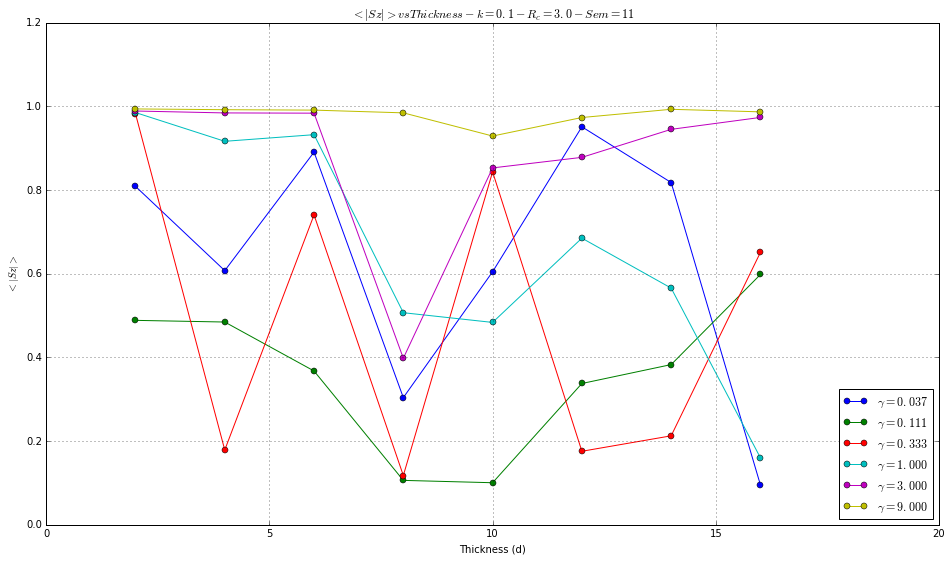

-----------
Semilla 13
-----------

 Gamma =  0.037

 Gamma =  0.111

 Gamma =  0.333

 Gamma =  1.000

 Gamma =  3.000

 Gamma =  9.000


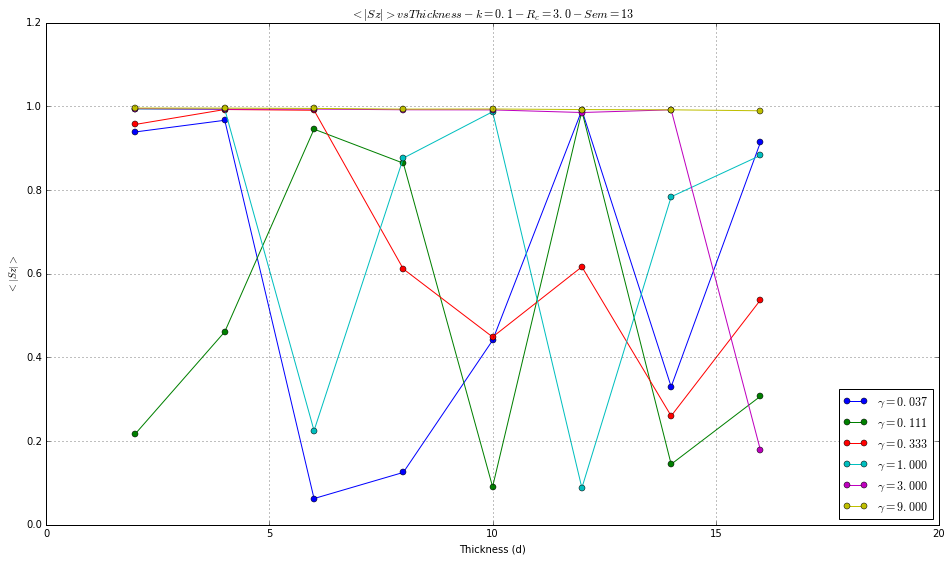

-----------
Semilla 17
-----------

 Gamma =  0.037

 Gamma =  0.111

 Gamma =  0.333

 Gamma =  1.000

 Gamma =  3.000

 Gamma =  9.000


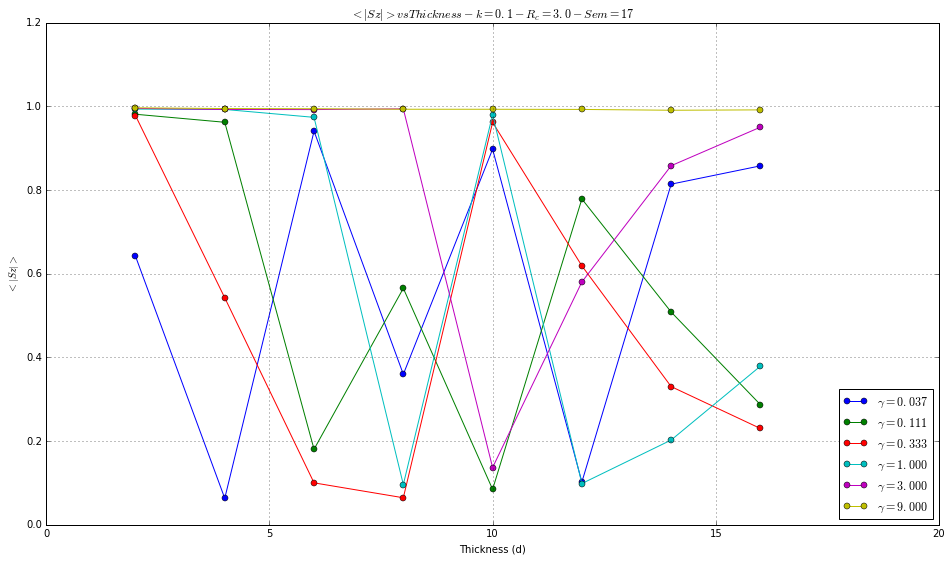

-----------
Semilla 19
-----------

 Gamma =  0.037

 Gamma =  0.111

 Gamma =  0.333

 Gamma =  1.000

 Gamma =  3.000

 Gamma =  9.000


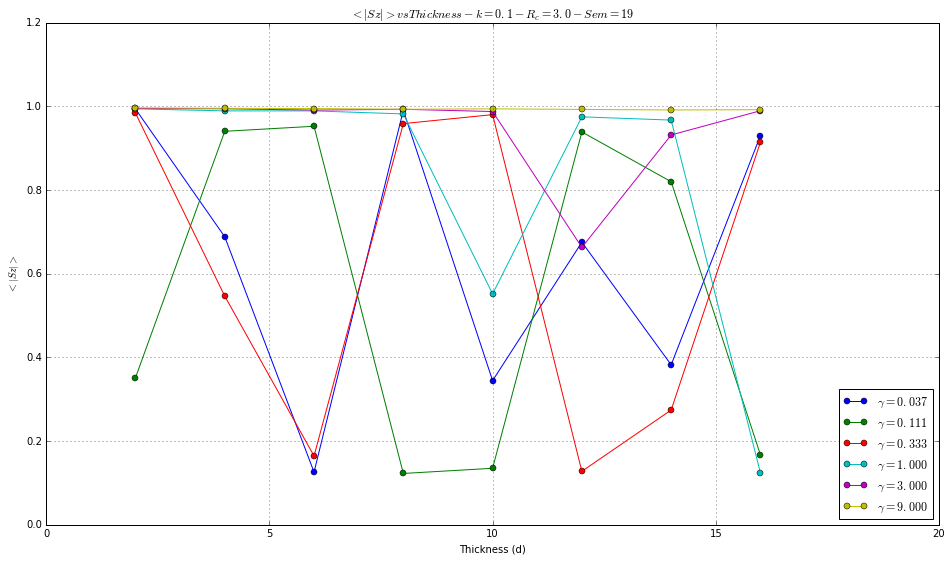

-----------
Semilla 23
-----------

 Gamma =  0.037

 Gamma =  0.111

 Gamma =  0.333

 Gamma =  1.000

 Gamma =  3.000

 Gamma =  9.000


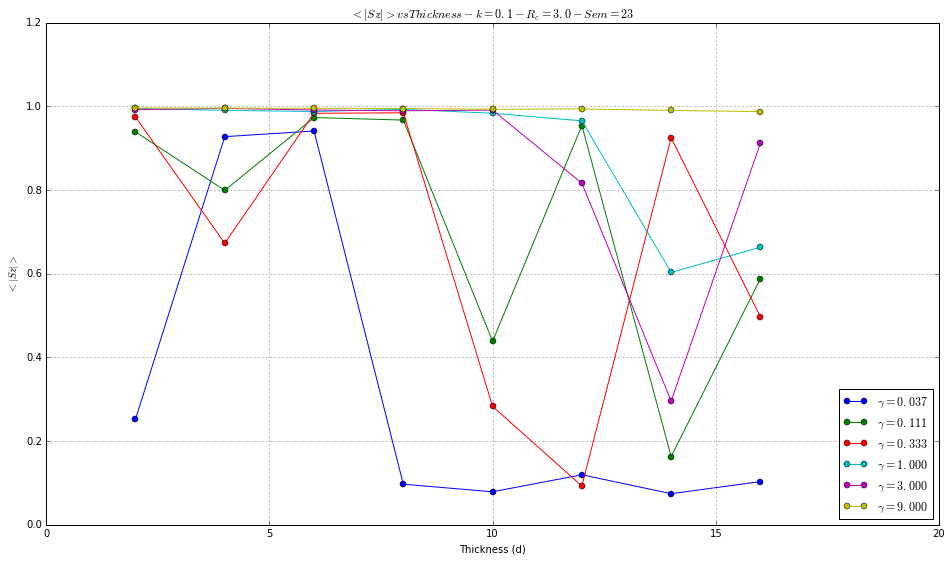

In [26]:
# Mean absolute Z Projection vs Thickness plot

for f in folder:
    print('-----------')
    print('Semilla %s' %f)
    print('-----------')
    plt.figure(figsize=(16,9))
    
    for g in gamma:
        print('\n Gamma = ', g)
        Thick = []
        MeanZ = []
        
        for d in thickness:
            sftp_client = ssh.open_sftp()
            file = sftp_client.open('Simulation_01_12_2015_Sem_%s/simulations/d%s/k0.1/gamma%s/EstFinal.dat' % (f,d,g))

            Sz = loadtxt(file, usecols=(6, ), unpack=True)
            SzMean = SpVal_Z(Sz)
            MeanZ.append(SzMean)
            Thick.append(d)
            
        plt.plot(Thick, MeanZ, '-o', label = "$\\gamma = %s$" % g)
        plt.axis([0, 20, 0, 1.2])

    plt.legend(loc=4)
    plt.xlabel('Thickness (d)')
    plt.ylabel('$< \\vert Sz \\vert >$')
    plt.title('$< \\vert Sz \\vert > vs Thickness - k = 0.1 - R_{c} = 3.0 - Sem = %s$' % f)
    plt.grid(True)           
    plt.show()

-----------
Gamma 0.037
-----------

 Semilla =  11

 Semilla =  13

 Semilla =  17

 Semilla =  19

 Semilla =  23


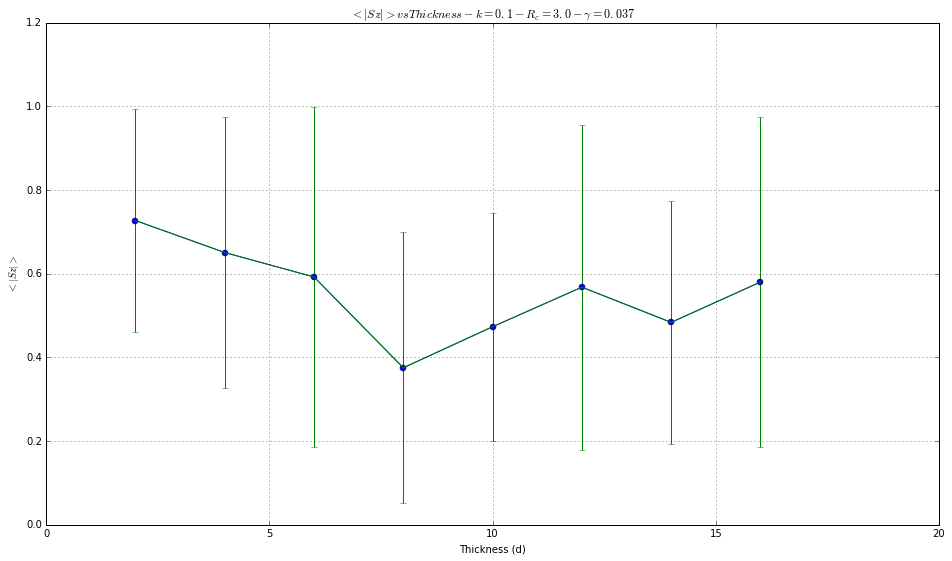

-----------
Gamma 0.111
-----------

 Semilla =  11

 Semilla =  13

 Semilla =  17

 Semilla =  19

 Semilla =  23


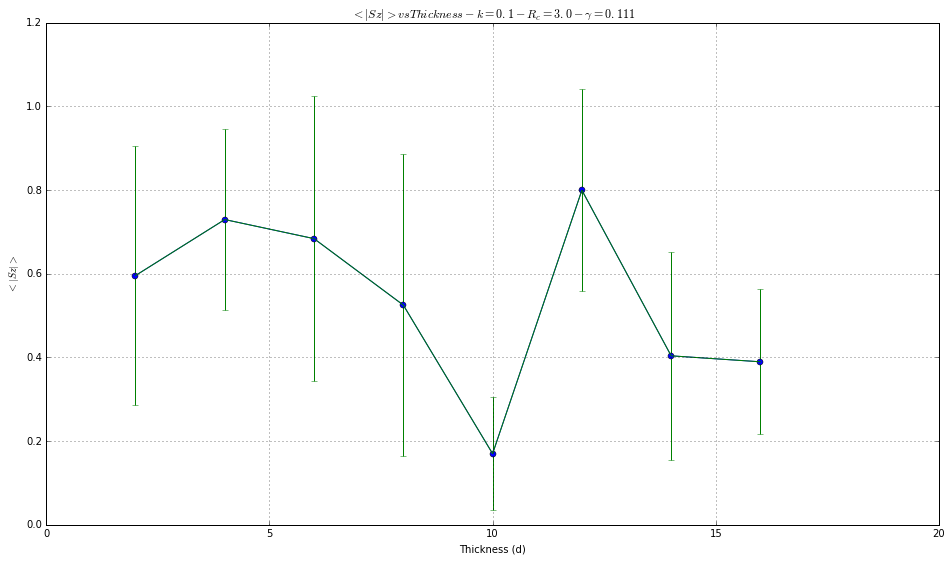

-----------
Gamma 0.333
-----------

 Semilla =  11

 Semilla =  13

 Semilla =  17

 Semilla =  19

 Semilla =  23


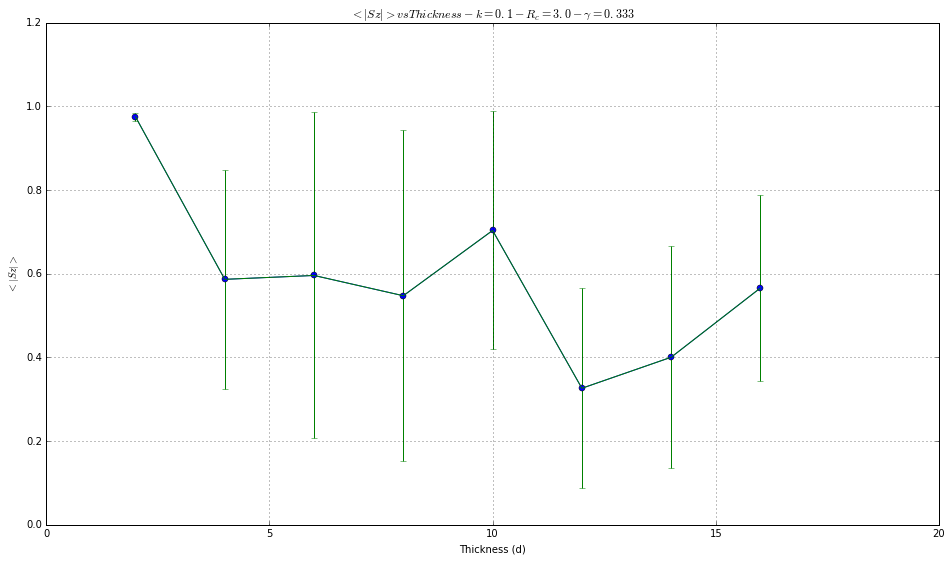

-----------
Gamma 1.000
-----------

 Semilla =  11

 Semilla =  13

 Semilla =  17

 Semilla =  19

 Semilla =  23


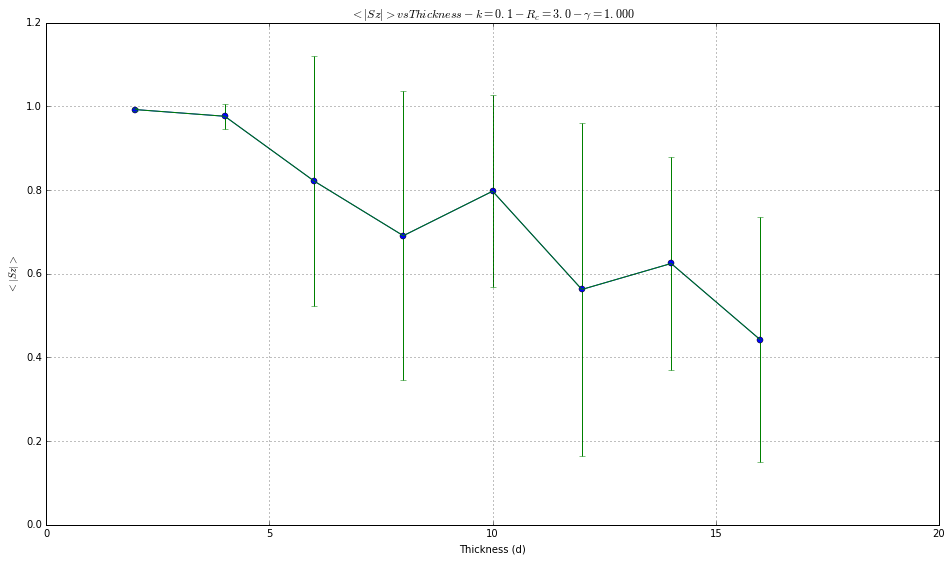

-----------
Gamma 3.000
-----------

 Semilla =  11

 Semilla =  13

 Semilla =  17

 Semilla =  19

 Semilla =  23


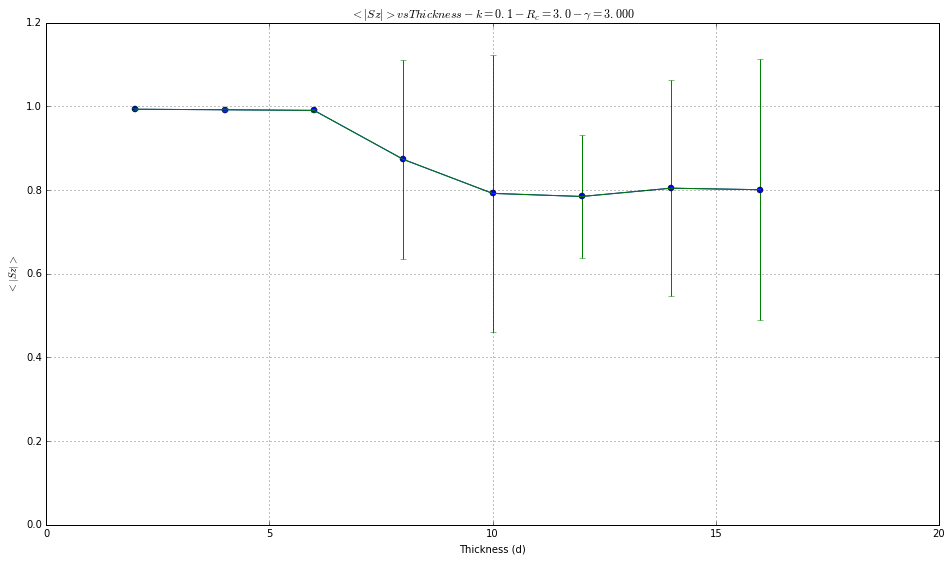

-----------
Gamma 9.000
-----------

 Semilla =  11

 Semilla =  13

 Semilla =  17

 Semilla =  19

 Semilla =  23


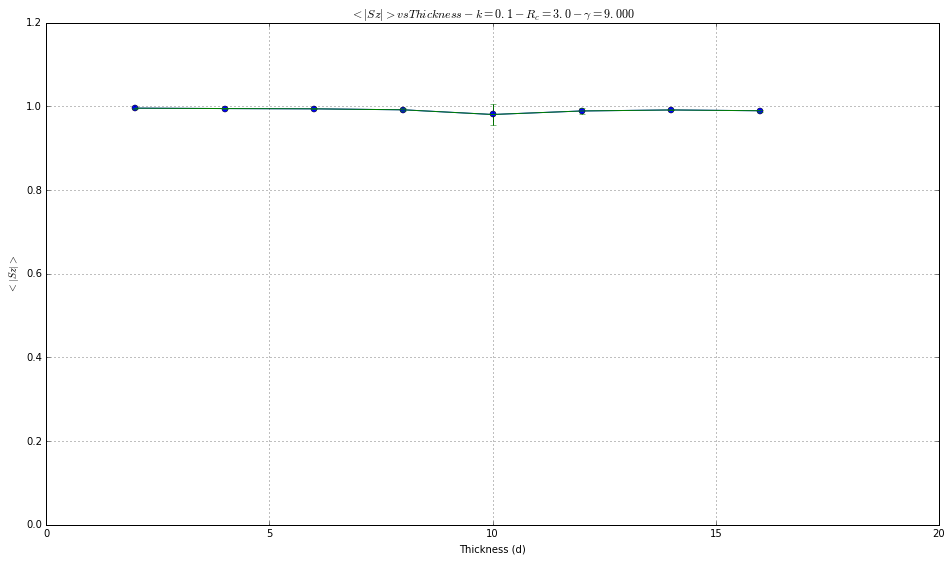

In [21]:
# Mean absolute Z Projection vs Thickness plot (Statistics)

for g in gamma:
    print('-----------')
    print('Gamma %s' % g)
    print('-----------')
    
    plt.figure(figsize=(16,9))
    
    MeanZMatrix = np.zeros((5,8))
    
    for i,f in enumerate(folder):
        print('\n Semilla = ', f)
        Thick = []
        MeanZ = []
        
        for d in thickness:
            sftp_client = ssh.open_sftp()
            file = sftp_client.open('Simulation_01_12_2015_Sem_%s/simulations/d%s/k0.1/gamma%s/EstFinal.dat' % (f,d,g))

            Sz = loadtxt(file, usecols=(6, ), unpack=True)
            SzMean = SpVal_Z(Sz)
            MeanZ.append(SzMean)
            Thick.append(d)
        
        MeanZMatrix[:][i] = MeanZ
    
    MeanZ_Mean = np.mean(MeanZMatrix, axis=0)
    errors = np.std(MeanZMatrix, axis=0)
        
    plt.plot(Thick, MeanZ_Mean, '-o')
    plt.errorbar(Thick,MeanZ_Mean, yerr=errors)
    plt.axis([0, 20, 0, 1.2])

    plt.xlabel('Thickness (d)')
    plt.ylabel('$< \\vert Sz \\vert >$')
    plt.title('$< \\vert Sz \\vert > vs Thickness - k = 0.1 - R_{c} = 3.0 - \\gamma = %s$' % g)
    plt.grid(True)           
    plt.show()